In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\HR-Employee-Attrition.csv")

data['Attrition_ind'] = 0
data.loc[data['Attrition']=='Yes', 'Attrition_ind'] = 1

dummy_busnstrvl = pd.get_dummies(data['BusinessTravel'], prefix='busns_trvl')
dummy_dept = pd.get_dummies(data['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(data['EducationField'], prefix='edufield')
dummy_gender = pd.get_dummies(data['Gender'], prefix='gend')
dummy_jobrole = pd.get_dummies(data['JobRole'], prefix='jobrole')
dummy_maritstat = pd.get_dummies(data['MaritalStatus'], prefix='maritalstat') 
dummy_overtime = pd.get_dummies(data['OverTime'], prefix='overtime')

continuous_columns = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
'YearsWithCurrManager']

data_continuous = data[continuous_columns]

data_new = pd.concat([dummy_busnstrvl, dummy_dept, dummy_edufield, dummy_gender, dummy_jobrole,
  dummy_maritstat, dummy_overtime, data_continuous, data['Attrition_ind']], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(data_new.drop(['Attrition_ind'],axis=1), data_new['Attrition_ind'], train_size = 0.7, random_state=42)


# Decision Tree Classifier:

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_fit = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_fit.fit(xtrain, ytrain)

print ("\nDecision Tree - Train Confusion Matrix\n\n", pd.crosstab(ytrain, dt_fit.predict(xtrain), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nDecision Tree - Train accuracy:", round(accuracy_score(ytrain, dt_fit.predict(xtrain)), 3))
print ("\nDecision Tree - Train Classification Report\n", classification_report(ytrain, dt_fit.predict(xtrain)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(ytest, dt_fit.predict(xtest), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(ytest, dt_fit.predict(xtest)), 3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(ytest, dt_fit.predict(xtest)))


Decision Tree - Train Confusion Matrix

 Predicted    0   1
Actuall           
0          844   9
1           98  78

Decision Tree - Train accuracy: 0.896

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       853
           1       0.90      0.44      0.59       176

    accuracy                           0.90      1029
   macro avg       0.90      0.72      0.77      1029
weighted avg       0.90      0.90      0.88      1029



Decision Tree - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          361  19
1           49  12

Decision Tree - Test accuracy: 0.846

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       4

### Tuning class weights to analyze Accuracy, Precision & Recall:

In [37]:
dummyarray = np.empty((6,10))
dt_wttune = pd.DataFrame(dummyarray)

dt_wttune.columns = ["zero_wght", "one_wght", "tr_accuracy", "tst_accuracy", "prec_zero", "prec_one","prec_ovll", "recl_zero", "recl_one", "recl_ovll"]

zero_clwghts = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(zero_clwghts)):
    clwght = {0:zero_clwghts[i], 1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight = clwght)
    dt_fit.fit(xtrain, ytrain)
    
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]       
    dt_wttune.loc[i, 'one_wght'] = clwght[1]     
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(ytrain, dt_fit.predict(xtrain)), 3)    
    dt_wttune.loc[i, 'tst_accuracy'] = round(accuracy_score(ytest, dt_fit.predict(xtest)), 3)          
    clf_sp = classification_report(ytest, dt_fit.predict(xtest)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])   
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])   
    dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[19])     
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])   
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])   
    dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[20])
    print ("\nClass Weights", clwght, "Train accuracy:", round(accuracy_score(ytrain, dt_fit.predict(xtrain)), 3), "Test accuracy:", round(accuracy_score(ytest, dt_fit.predict(xtest)), 3))
    print ("Test Confusion Matrix\n\n", pd.crosstab(ytest, dt_fit.predict(xtest), rownames = ["Actuall"], colnames = ["Predicted"]))     


Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.342 Test accuracy: 0.272
Test Confusion Matrix

 Predicted   0    1
Actuall           
0          65  315
1           6   55

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.806 Test accuracy: 0.732
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          282  98
1           20  41

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.871 Test accuracy: 0.83
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          341  39
1           36  25

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.881 Test accuracy: 0.837
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          345  35
1           37  24

Class Weights {0: 0.4, 1: 0.6} Train accuracy: 0.894 Test accuracy: 0.832
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          346  34
1           40  21

Class Weights {0: 0.5, 1: 0.5} Train accuracy: 0.896 Test accuracy: 0.846
Test Confusion Matrix

 Predicted    0   1
Actual

# Bagging Classifier:

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_fit = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight = {0:0.3,1:0.7})

bag_fit = BaggingClassifier(base_estimator= dt_fit, n_estimators=5000, max_samples=0.67, max_features=1.0, bootstrap=True, bootstrap_features=True, n_jobs=-1, random_state=42)

bag_fit.fit(xtrain, ytrain)

print ("\nBagging - Train Confusion Matrix\n\n", pd.crosstab(ytrain,bag_fit.predict(xtrain), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nBagging- Train accuracy", round(accuracy_score(ytrain,bag_fit.predict(xtrain)),3))
print ("\nBagging  - Train Classification Report\n",classification_report(ytrain, bag_fit.predict(xtrain)))

print ("\n\nBagging - Test Confusion Matrix\n\n", pd.crosstab(ytest, bag_fit.predict(xtest), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nBagging - Test accuracy", round(accuracy_score(ytest, bag_fit.predict(xtest)), 3))
print ("\nBagging - Test Classification Report\n", classification_report(ytest, bag_fit.predict(xtest)))



Bagging - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          846    7
1           70  106

Bagging- Train accuracy 0.925

Bagging  - Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       853
           1       0.94      0.60      0.73       176

    accuracy                           0.93      1029
   macro avg       0.93      0.80      0.85      1029
weighted avg       0.93      0.93      0.92      1029



Bagging - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           48  13

Bagging - Test accuracy 0.873

Bagging - Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.62      0.21      0.32        61

    accuracy                           0.87       441
   macro avg       0.75      0.60      0.62       441
weighted avg       0.85      0.

# Random Forest Classifier:


Random Forest - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          841   12
1           76  100

Random Forest - Train accuracy 0.914

Random Forest  - Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       853
           1       0.89      0.57      0.69       176

    accuracy                           0.91      1029
   macro avg       0.90      0.78      0.82      1029
weighted avg       0.91      0.91      0.91      1029



Random Forest - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          373   7
1           47  14

Random Forest - Test accuracy 0.878

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.67      0.23      0.34        61

    accuracy                           0.88       441
   macro avg       0.78      0.61      0.64     

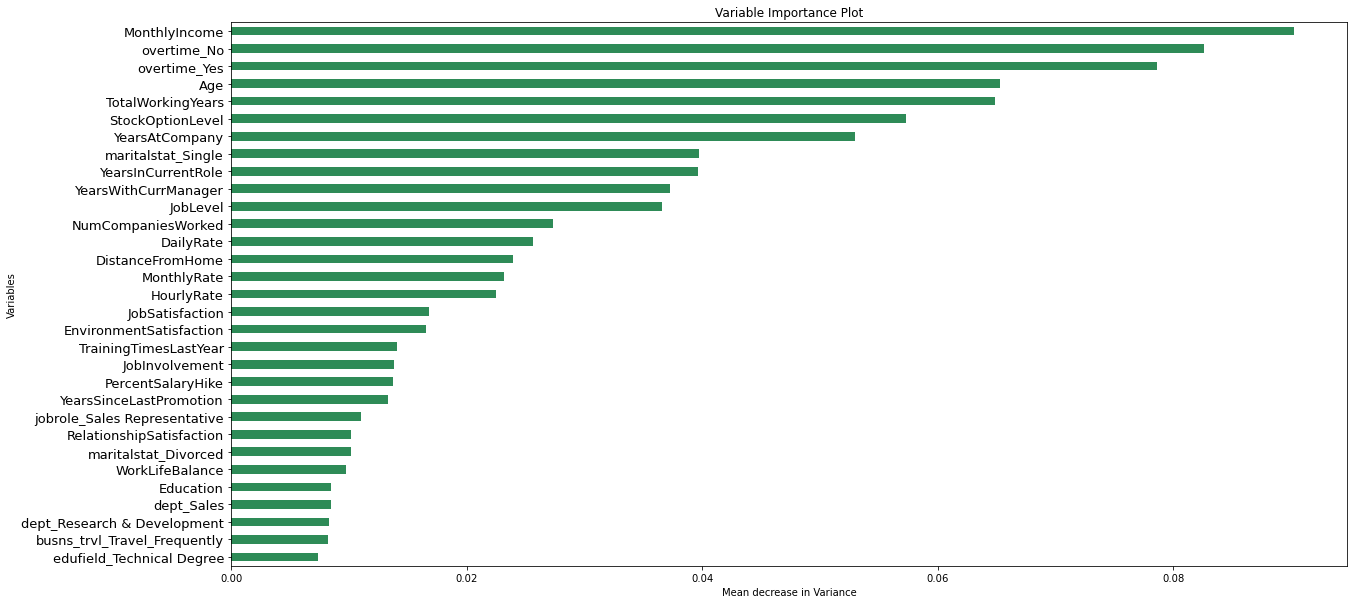

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=5000, criterion="gini", max_depth=5, min_samples_split=2,bootstrap=True,max_features='auto',random_state=42,min_samples_leaf=1,class_weight = {0:0.3,1:0.7})
rf_fit.fit(xtrain, ytrain)       

print ("\nRandom Forest - Train Confusion Matrix\n\n", pd.crosstab(ytrain,rf_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy", round(accuracy_score(ytrain,rf_fit.predict(xtrain)),3))
print ("\nRandom Forest  - Train Classification Report\n", classification_report(ytrain,rf_fit.predict(xtrain)))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n", pd.crosstab(ytest, rf_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy", round(accuracy_score(ytest, rf_fit.predict(xtest)),3))
print ("\nRandom Forest - Test Classification Report\n", classification_report(ytest, rf_fit.predict(xtest)))


# Plot of Variable importance by mean decrease in gini
model_ranks = pd.Series(rf_fit.feature_importances_, index=xtrain.columns, name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True, inplace=False)
plt.figure(figsize=(20, 10))
ax = top_features.plot(kind='barh', color="seagreen")
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)

# Random Forest Classifier - Grid Search:

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini', class_weight = {0:0.3,1:0.7}))])

parameters = { 'clf__n_estimators':(2000,3000,5000), 'clf__max_depth':(5,15,30), 'clf__min_samples_split':(2,3), 'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(xtest)

print ("Testing accuracy:", round(accuracy_score(ytest, predictions),4))
print ("\nComplete report of Testing data\n", classification_report(ytest, predictions))
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n", pd.crosstab(ytest, predictions, rownames = ["Actuall"], colnames = ["Predicted"]))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Training score: 0.868
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 2
	clf__min_samples_split: 3
	clf__n_estimators: 2000
Testing accuracy: 0.8753

Complete report of Testing data
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.64      0.23      0.34        61

    accuracy                           0.88       441
   macro avg       0.76      0.60      0.63       441
weighted avg       0.85      0.88      0.85       441



Random Forest Grid Search- Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           47  14


# Adaboost Classifier:


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=1)

adabst_fit = AdaBoostClassifier(base_estimator= dtree, n_estimators=5000,learning_rate=0.05,random_state=42)

adabst_fit.fit(xtrain, ytrain)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(ytrain,adabst_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Train accuracy",round(accuracy_score(ytrain,adabst_fit.predict(xtrain)),3))
print ("\nAdaBoost - Train Classification Report\n",classification_report(ytrain,adabst_fit.predict(xtrain)))

print ("\n\nAdaBoost - Test Confusion Matrix\n\n",pd.crosstab(ytest,adabst_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Test accuracy",round(accuracy_score(ytest,adabst_fit.predict(xtest)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(ytest,adabst_fit.predict(xtest)))



AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          844    9
1           55  121

AdaBoost - Train accuracy 0.938

AdaBoost - Train Classification Report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       853
           1       0.93      0.69      0.79       176

    accuracy                           0.94      1029
   macro avg       0.93      0.84      0.88      1029
weighted avg       0.94      0.94      0.93      1029



AdaBoost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          360  20
1           38  23

AdaBoost - Test accuracy 0.868

AdaBoost - Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       380
           1       0.53      0.38      0.44        61

    accuracy                           0.87       441
   macro avg       0.72      0.66      0.68       441
weighted avg       0.85  

# Gradientboost Classifier:

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(loss='deviance', learning_rate=0.05, n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_depth=1, random_state=42 )
gbc_fit.fit(xtrain,ytrain)

print ("\nGradient Boost - Train Confusion Matrix\n\n",pd.crosstab(ytrain,gbc_fit.predict(xtrain), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nGradient Boost - Train accuracy",round(accuracy_score(ytrain,gbc_fit.predict(xtrain)),3))
print ("\nGradient Boost  - Train Classification Report\n",classification_report(ytrain,gbc_fit.predict(xtrain)))

print ("\n\nGradient Boost - Test Confusion Matrix\n\n",pd.crosstab(ytest,gbc_fit.predict(xtest), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nGradient Boost - Test accuracy",round(accuracy_score(ytest,gbc_fit.predict(xtest)),3))
print ("\nGradient Boost - Test Classification Report\n",classification_report(ytest,gbc_fit.predict(xtest)))


Gradient Boost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          850    3
1           49  127

Gradient Boost - Train accuracy 0.949

Gradient Boost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       853
           1       0.98      0.72      0.83       176

    accuracy                           0.95      1029
   macro avg       0.96      0.86      0.90      1029
weighted avg       0.95      0.95      0.95      1029



Gradient Boost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          362  18
1           37  24

Gradient Boost - Test accuracy 0.875

Gradient Boost - Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.57      0.39      0.47        61

    accuracy                           0.88       441
   macro avg       0.74      0.67      0.7

# Xgboost Classifier:


In [46]:
import xgboost as xgb

xgb_fit = xgb.XGBClassifier(max_depth=2, n_estimators=5000, learning_rate=0.05)
xgb_fit.fit(xtrain, ytrain)

print ("\nXGBoost - Train Confusion Matrix\n\n",pd.crosstab(ytrain,xgb_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Train accuracy",round(accuracy_score(ytrain,xgb_fit.predict(xtrain)),3))
print ("\nXGBoost  - Train Classification Report\n",classification_report(ytrain,xgb_fit.predict(xtrain)))

print ("\n\nXGBoost - Test Confusion Matrix\n\n",pd.crosstab(ytest,xgb_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Test accuracy",round(accuracy_score(ytest,xgb_fit.predict(xtest)),3))
print ("\nXGBoost - Test Classification Report\n",classification_report(ytest,xgb_fit.predict(xtest)))


C:\Users\talk2_000\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          853    0
1            0  176

XGBoost - Train accuracy 1.0

XGBoost  - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



XGBoost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          361  19
1           38  23

XGBoost - Test accuracy 0.871

XGBoost - Test Classification Re

# Ensemble of Ensembles - by fitting various classifiers:

In [47]:
clwght = {0:0.3,1:0.7}

# Classifier 1
from sklearn.linear_model import LogisticRegression
clf1_logreg_fit = LogisticRegression(fit_intercept=True, class_weight=clwght)
clf1_logreg_fit.fit(xtrain, ytrain)

print ("\nLogistic Regression for Ensemble - Train Confusion Matrix\n\n",pd.crosstab(ytrain,clf1_logreg_fit.predict(xtrain),rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nLogistic Regression for Ensemble - Train accuracy",round(accuracy_score(ytrain,clf1_logreg_fit.predict(xtrain)),3))
print ("\nLogistic Regression for Ensemble - Train Classification Report\n",classification_report(ytrain,clf1_logreg_fit.predict(xtrain)))

print ("\n\nLogistic Regression for Ensemble - Test Confusion Matrix\n\n",pd.crosstab(ytest, clf1_logreg_fit.predict(xtest), rownames = ["Actuall"], colnames = ["Predicted"]))      
print ("\nLogistic Regression for Ensemble - Test accuracy",round(accuracy_score(ytest, clf1_logreg_fit.predict(xtest)),3))
print ("\nLogistic Regression for Ensemble - Test Classification Report\n",classification_report(ytest, clf1_logreg_fit.predict(xtest)))

# Classifier 2
from sklearn.tree import DecisionTreeClassifier
clf2_dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2, min_samples_leaf=1,random_state=42,class_weight=clwght)
clf2_dt_fit.fit(xtrain, ytrain)

print ("\nDecision Tree for Ensemble - Train Confusion Matrix\n\n", pd.crosstab(ytrain,clf2_dt_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree for Ensemble - Train accuracy", round(accuracy_score(ytrain,clf2_dt_fit.predict(xtrain)),3))
print ("\nDecision Tree for Ensemble - Train Classification Report\n",classification_report(ytrain,clf2_dt_fit.predict(xtrain)))

print ("\n\nDecision Tree for Ensemble - Test Confusion Matrix\n\n", pd.crosstab(ytest,clf2_dt_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree for Ensemble - Test accuracy", round(accuracy_score(ytest,clf2_dt_fit.predict(xtest)),3))
print ("\nDecision Tree for Ensemble - Test Classification Report\n", classification_report(ytest,clf2_dt_fit.predict(xtest)))


# Classifier 3
from sklearn.ensemble import RandomForestClassifier
clf3_rf_fit = RandomForestClassifier(n_estimators=10000, criterion="gini", max_depth=6,min_samples_split=2,min_samples_leaf=1,class_weight = clwght)
clf3_rf_fit.fit(xtrain, ytrain)       

print ("\nRandom Forest for Ensemble - Train Confusion Matrix\n\n",pd.crosstab(ytrain,clf3_rf_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest for Ensemble - Train accuracy",round(accuracy_score(ytrain,clf3_rf_fit.predict(xtrain)),3))
print ("\nRandom Forest for Ensemble - Train Classification Report\n",classification_report(ytrain,clf3_rf_fit.predict(xtrain)))

print ("\n\nRandom Forest for Ensemble - Test Confusion Matrix\n\n",pd.crosstab(ytest,clf3_rf_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest for Ensemble - Test accuracy",round(accuracy_score(ytest,clf3_rf_fit.predict(xtest)),3))
print ("\nRandom Forest for Ensemble - Test Classification Report\n",classification_report(ytest,clf3_rf_fit.predict(xtest)))


# Classifier 4
from sklearn.ensemble import AdaBoostClassifier
clf4_dtree = DecisionTreeClassifier(criterion='gini',max_depth=1,class_weight = clwght)
clf4_adabst_fit = AdaBoostClassifier(base_estimator= clf4_dtree, n_estimators=5000, learning_rate=0.05,random_state=42)

clf4_adabst_fit.fit(xtrain, ytrain)

print ("\nAdaBoost for Ensemble - Train Confusion Matrix\n\n", pd.crosstab(ytrain,clf4_adabst_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost for Ensemble - Train accuracy", round(accuracy_score(ytrain,clf4_adabst_fit.predict(xtrain)),3))
print ("\nAdaBoost for Ensemble - Train Classification Report\n", classification_report(ytrain,clf4_adabst_fit.predict(xtrain)))

print ("\n\nAdaBoost for Ensemble - Test Confusion Matrix\n\n", pd.crosstab(ytest,clf4_adabst_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost for Ensemble - Test accuracy", round(accuracy_score(ytest,clf4_adabst_fit.predict(xtest)),3))
print ("\nAdaBoost for Ensemble - Test Classification Report\n", classification_report(ytest,clf4_adabst_fit.predict(xtest)))


ensemble = pd.DataFrame()

ensemble["log_output_one"] = pd.DataFrame(clf1_logreg_fit.predict_proba(xtrain))[1]
ensemble["dtr_output_one"] = pd.DataFrame(clf2_dt_fit.predict_proba(xtrain))[1]
ensemble["rf_output_one"] = pd.DataFrame(clf3_rf_fit.predict_proba(xtrain))[1]
ensemble["adb_output_one"] = pd.DataFrame(clf4_adabst_fit.predict_proba(xtrain))[1]

ensemble = pd.concat([ensemble, pd.DataFrame(ytrain).reset_index(drop = True )], axis=1)

# Fitting meta-classifier
meta_logit_fit =  LogisticRegression(fit_intercept=False)
meta_logit_fit.fit(ensemble[['log_output_one', 'dtr_output_one', 'rf_output_one', 'adb_output_one']],ensemble['Attrition_ind'])

coefs =  meta_logit_fit.coef_
print ("Co-efficients for LR, DT, RF & AB are:", coefs)

ensemble_test = pd.DataFrame()
ensemble_test["log_output_one"] = pd.DataFrame(clf1_logreg_fit.predict_proba(xtest))[1]
ensemble_test["dtr_output_one"] = pd.DataFrame(clf2_dt_fit.predict_proba(xtest))[1]
ensemble_test["rf_output_one"] = pd.DataFrame(clf3_rf_fit.predict_proba(xtest))[1]
ensemble_test["adb_output_one"] = pd.DataFrame(clf4_adabst_fit.predict_proba(xtest))[1]

ensemble_test["all_one"] = meta_logit_fit.predict(ensemble_test[['log_output_one','dtr_output_one','rf_output_one','adb_output_one']])

ensemble_test = pd.concat([ensemble_test, pd.DataFrame(ytest).reset_index(drop = True )], axis=1)

print ("\n\nEnsemble of Models - Test Confusion Matrix\n\n", pd.crosstab(ensemble_test['Attrition_ind'],ensemble_test['all_one'],rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nEnsemble of Models - Test accuracy", round(accuracy_score(ensemble_test['Attrition_ind'],ensemble_test['all_one']),3))
print ("\nEnsemble of Models - Test Classification Report\n", classification_report(ensemble_test['Attrition_ind'],ensemble_test['all_one']))

# Ensemble of Ensembles - by applying bagging on simple classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

clwght = {0:0.3, 1:0.7}

eoe_dtree = DecisionTreeClassifier(criterion='gini',max_depth=1,class_weight = clwght)
eoe_adabst_fit = AdaBoostClassifier(base_estimator= eoe_dtree, n_estimators=500, learning_rate=0.05,random_state=42)
eoe_adabst_fit.fit(xtrain, ytrain)

print ("\nAdaBoost - Train Confusion Matrix\n\n", pd.crosstab(ytrain,eoe_adabst_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Train accuracy", round(accuracy_score(ytrain,eoe_adabst_fit.predict(xtrain)),3))
print ("\nAdaBoost - Train Classification Report\n", classification_report(ytrain,eoe_adabst_fit.predict(xtrain)))

print ("\n\nAdaBoost - Test Confusion Matrix\n\n", pd.crosstab(ytest,eoe_adabst_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Test accuracy", round(accuracy_score(ytest,eoe_adabst_fit.predict(xtest)),3))
print ("\nAdaBoost - Test Classification Report\n", classification_report(ytest,eoe_adabst_fit.predict(xtest)))


bag_fit = BaggingClassifier(base_estimator= eoe_adabst_fit, n_estimators=50, max_samples=1.0, max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1,random_state=42)
bag_fit.fit(xtrain, ytrain)

print ("\nEnsemble of AdaBoost - Train Confusion Matrix\n\n",pd.crosstab(ytrain,bag_fit.predict(xtrain),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nEnsemble of AdaBoost - Train accuracy",round(accuracy_score(ytrain,bag_fit.predict(xtrain)),3))
print ("\nEnsemble of AdaBoost  - Train Classification Report\n",classification_report(ytrain,bag_fit.predict(xtrain)))

print ("\n\nEnsemble of AdaBoost - Test Confusion Matrix\n\n",pd.crosstab(ytest,bag_fit.predict(xtest),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nEnsemble of AdaBoost - Test accuracy",round(accuracy_score(ytest,bag_fit.predict(xtest)),3))
print ("\nEnsemble of AdaBoost - Test Classification Report\n",classification_report(ytest,bag_fit.predict(xtest)))

C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression for Ensemble - Train Confusion Matrix

 Predicted    0   1
Actuall           
0          784  69
1          101  75

Logistic Regression for Ensemble - Train accuracy 0.835

Logistic Regression for Ensemble - Train Classification Report
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       853
           1       0.52      0.43      0.47       176

    accuracy                           0.83      1029
   macro avg       0.70      0.67      0.69      1029
weighted avg       0.82      0.83      0.83      1029



Logistic Regression for Ensemble - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          334  46
1           42  19

Logistic Regression for Ensemble - Test accuracy 0.8

Logistic Regression for Ensemble - Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       380
           1       0.29      0.31      0.30       